In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

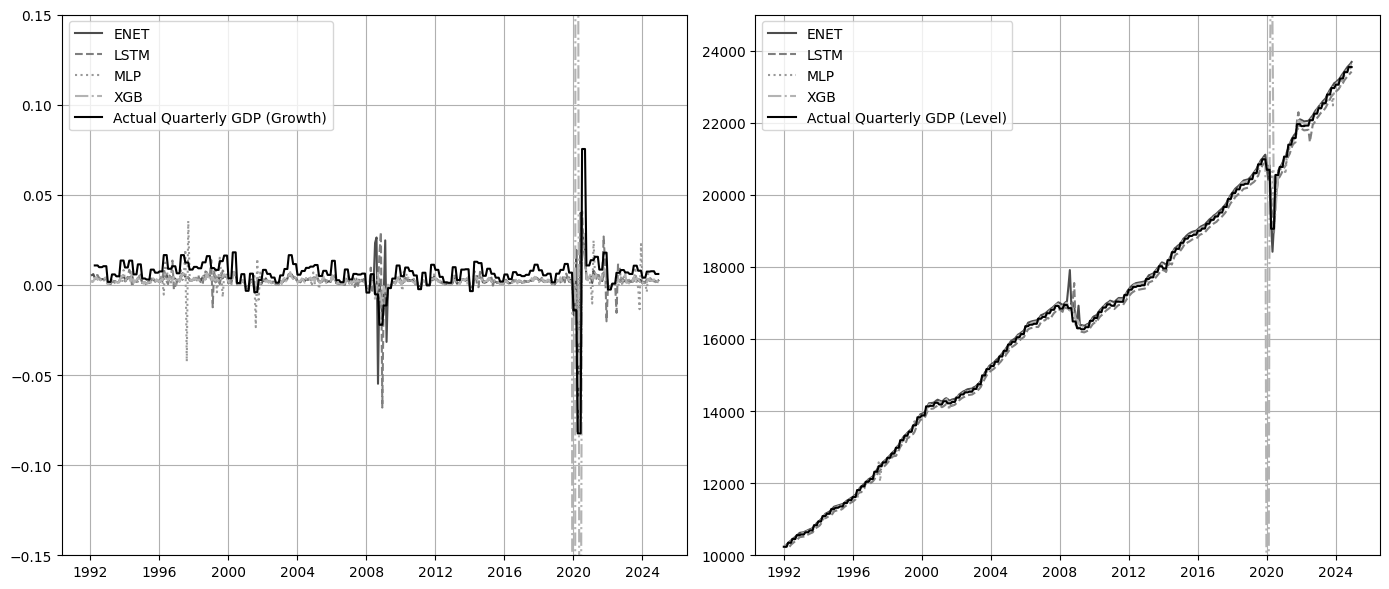

In [5]:
df = pd.read_csv('1_gdp_result_US.csv')

# Rename actual GDP columns
df = df.rename(columns={
    'Act_growth': 'Actual Quarterly GDP (Growth)',
    'Act_level': 'Actual Quarterly GDP (Level)'
})

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Prepare melted data for growth and level separately
growth_df = df[['Date', 'ENET_growth', 'LSTM_growth', 'MLP_growth', 'XGB_growth', 'Actual Quarterly GDP (Growth)']]
level_df = df[['Date', 'ENET_level', 'LSTM_level', 'MLP_level', 'XGB_level', 'Actual Quarterly GDP (Level)']]

growth_melted = growth_df.melt(id_vars='Date', var_name='Model', value_name='Value')
level_melted = level_df.melt(id_vars='Date', var_name='Model', value_name='Value')

# Clean model names
growth_melted['Model'] = growth_melted['Model'].str.replace('_growth', '')
level_melted['Model'] = level_melted['Model'].str.replace('_level', '')

# Define colors and linetypes
model_colors = {
    "Actual Quarterly GDP (Growth)": "#000000",
    "Actual Quarterly GDP (Level)": "#000000",
    "ENET": "#4D4D4D",
    "LSTM": "#7F7F7F",
    "MLP": "#999999",
    "XGB": "#B3B3B3"
}

model_linetypes = {
    "Actual Quarterly GDP (Growth)": "solid",
    "Actual Quarterly GDP (Level)": "solid",
    "ENET": "solid",
    "LSTM": "dashed",
    "MLP": "dotted",
    "XGB": "dashdot"
}

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

# Growth plot
for model in growth_melted['Model'].unique():
    temp_df = growth_melted[growth_melted['Model'] == model]
    axes[0].plot(temp_df['Date'], temp_df['Value'],
                 label=model,
                 color=model_colors.get(model, '#888888'),
                 linestyle=model_linetypes.get(model, 'solid'))
axes[0].set_ylim(-0.15, 0.15)
axes[0].grid(True)
axes[0].legend()

# Level plot
for model in level_melted['Model'].unique():
    temp_df = level_melted[level_melted['Model'] == model]
    axes[1].plot(temp_df['Date'], temp_df['Value'],
                 label=model,
                 color=model_colors.get(model, '#888888'),
                 linestyle=model_linetypes.get(model, 'solid'))
axes[1].set_ylim(10000, 25000)
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.savefig("US_monthly_gdp_all.pdf", bbox_inches='tight', dpi=500)
plt.show()


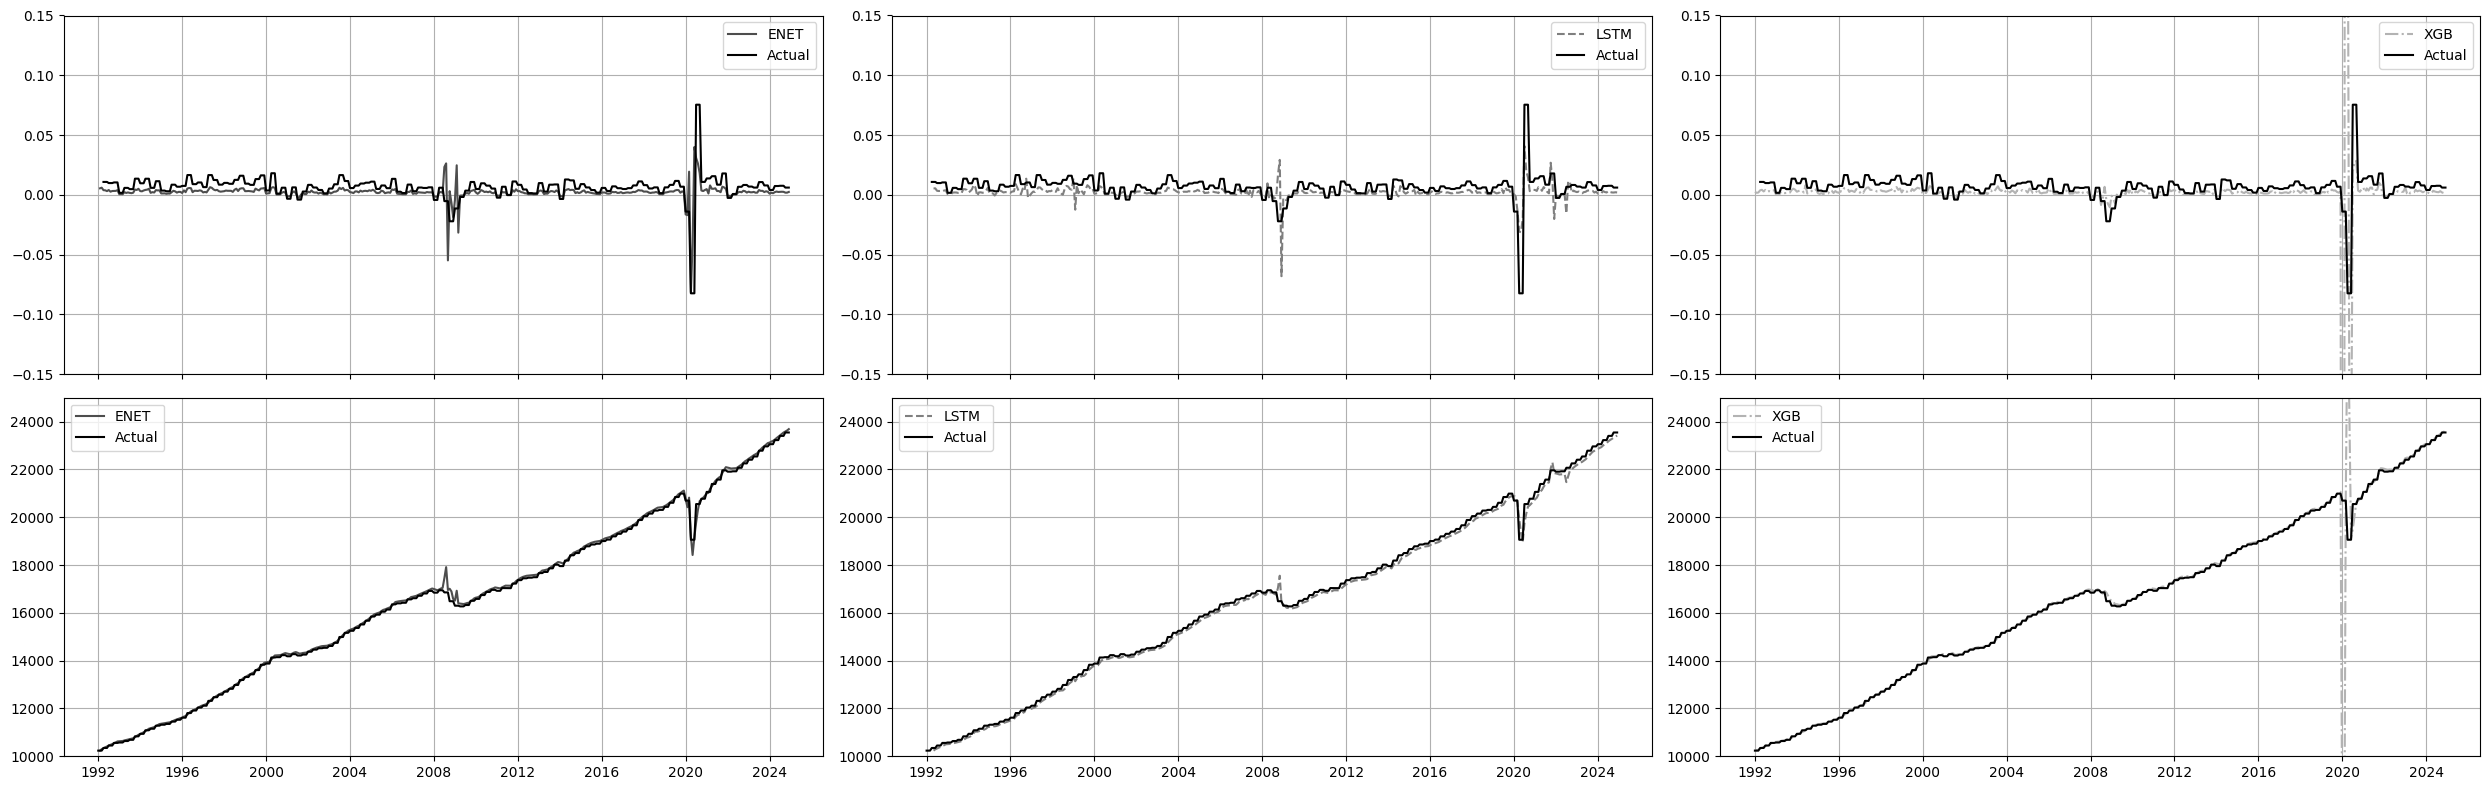

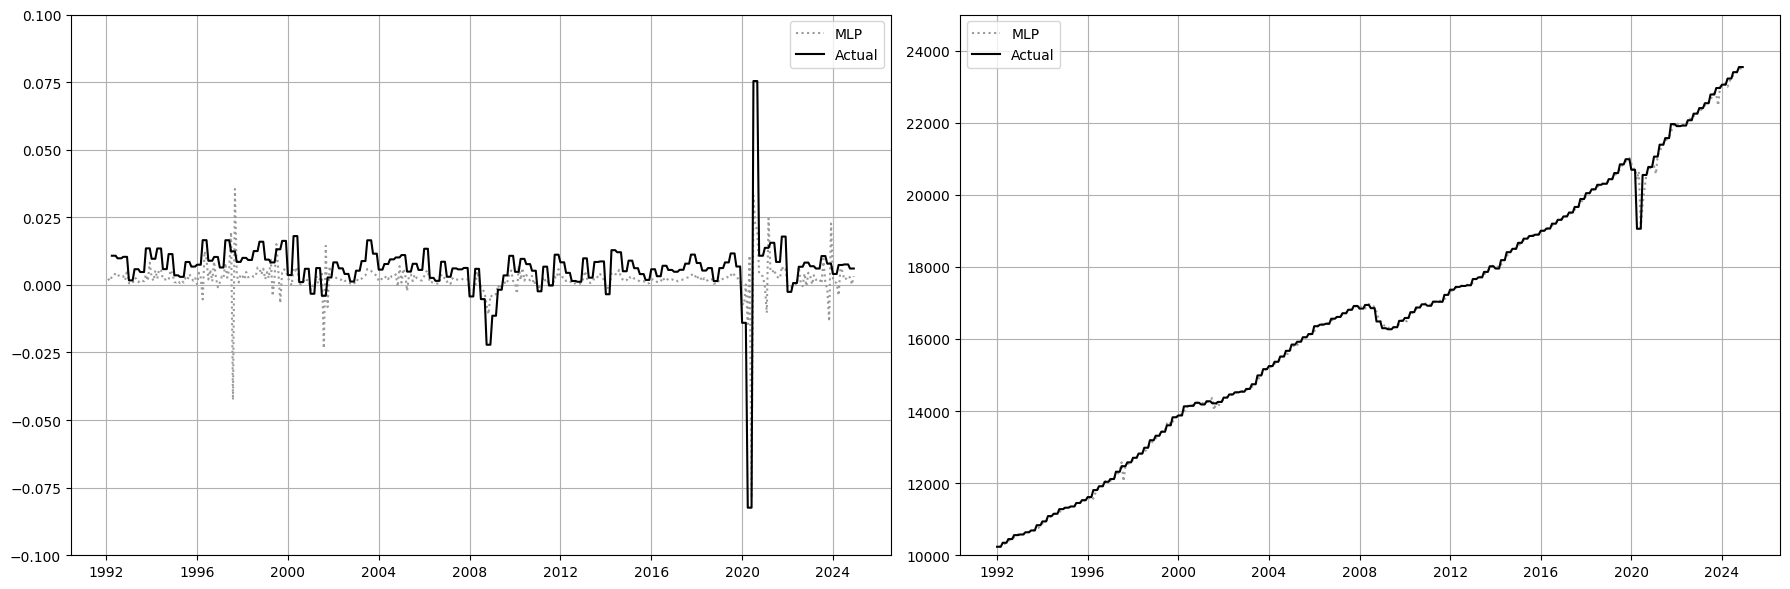

In [9]:
# Rename actual GDP columns
df = df.rename(columns={
    'Act_growth': 'Actual Quarterly GDP (Growth)',
    'Act_level': 'Actual Quarterly GDP (Level)'
})

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Define model list
models = ['ENET', 'LSTM', 'XGB', 'MLP']

# Set colors and linetypes
model_colors = {
    "Actual": "#000000",
    "ENET": "#4D4D4D",
    "LSTM": "#7F7F7F",
    "MLP": "#999999",
    "XGB": "#B3B3B3"
}

model_linetypes = {
    "Actual": "solid",
    "ENET": "solid",
    "LSTM": "dashed",
    "MLP": "dotted",
    "XGB": "dashdot"
}

# Plot ENET, LSTM, XGB in a 1x3 grid for Growth and Level
fig, axes = plt.subplots(2, 3, figsize=(25, 8), sharex=True)

for i, model in enumerate(models):
    if model != 'MLP':
        # Growth
        axes[0, i].plot(df['Date'], df[f'{model}_growth'], label=model, color=model_colors[model], linestyle=model_linetypes[model])
        axes[0, i].plot(df['Date'], df['Actual Quarterly GDP (Growth)'], label='Actual', color=model_colors["Actual"], linestyle=model_linetypes["Actual"])
        axes[0, i].set_ylim(-0.15, 0.15)
        axes[0, i].legend()
        axes[0, i].grid(True)

        # Level
        axes[1, i].plot(df['Date'], df[f'{model}_level'], label=model, color=model_colors[model], linestyle=model_linetypes[model])
        axes[1, i].plot(df['Date'], df['Actual Quarterly GDP (Level)'], label='Actual', color=model_colors["Actual"], linestyle=model_linetypes["Actual"])
        axes[1, i].set_ylim(10000, 25000)
        axes[1, i].legend()
        axes[1, i].grid(True)


plt.tight_layout()
plt.savefig("US_monthly_gdp_others.pdf", bbox_inches='tight', dpi=500)

# MLP Plot Separately
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Growth
axes[0].plot(df['Date'], df['MLP_growth'], label='MLP', color=model_colors["MLP"], linestyle=model_linetypes["MLP"])
axes[0].plot(df['Date'], df['Actual Quarterly GDP (Growth)'], label='Actual', color=model_colors["Actual"], linestyle=model_linetypes["Actual"])
axes[0].set_ylim(-0.1, 0.1)
axes[0].legend()
axes[0].grid(True)

# Level
axes[1].plot(df['Date'], df['MLP_level'], label='MLP', color=model_colors["MLP"], linestyle=model_linetypes["MLP"])
axes[1].plot(df['Date'], df['Actual Quarterly GDP (Level)'], label='Actual', color=model_colors["Actual"], linestyle=model_linetypes["Actual"])
axes[1].set_ylim(10000, 25000)
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.savefig("US_monthly_gdp_MLP.pdf", bbox_inches='tight', dpi=500)
plt.show()